In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("sales_data_with_discounts.csv")

In [6]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [7]:
df.isnull().sum()

Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

## Identify numerical columns in the dataset

In [9]:
Numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
Numerical_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

##	Calculate the mean, median, mode, and standard deviation for these columns

In [10]:
Stats = pd.DataFrame()

In [11]:
Stats['Mean'] = df[Numerical_cols].mean()
Stats['Median'] = df[Numerical_cols].median()
Stats['Standard Deviation'] = df[Numerical_cols].std()
Stats['Mode'] = df[Numerical_cols].mode().iloc[0]

In [12]:
print("\n Statistics:\n")
print(Stats)


 Statistics:

                           Mean       Median  Standard Deviation          Mode
Volume                 5.066667     4.000000            4.231602      3.000000
Avg Price          10453.433333  1450.000000        18079.904840    400.000000
Total Sales Value  33812.835556  5700.000000        50535.074173  24300.000000
Discount Rate (%)     15.155242    16.577766            4.220602      5.007822
Discount Amount     3346.499424   988.933733         4509.902963     69.177942
Net Sales Value    30466.336131  4677.788059        46358.656624    326.974801


Interpretation:

Volume: Average sales volume is around 5 units, with moderate variation — most transactions involve small quantities.

Avg Price: Prices vary widely (high standard deviation), showing both low-cost and premium products.

Total & Net Sales Value: Highly variable and right-skewed — a few large transactions dominate total revenue.

Discount Rate (%): Averages around 15%, suggesting consistent discounting practices.

Discount Amount: Varies greatly, higher for expensive items.

## Data Visualization

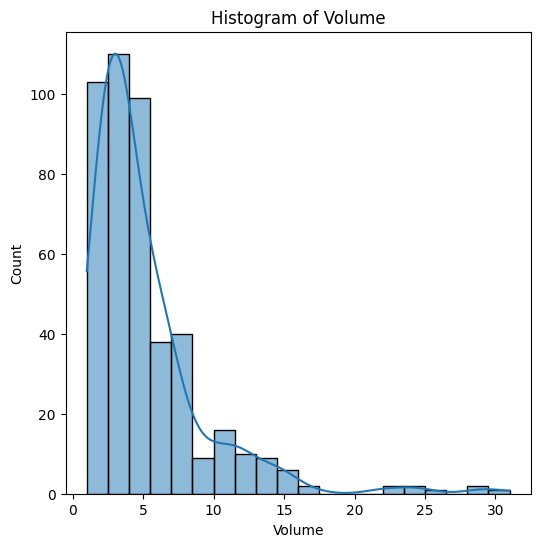

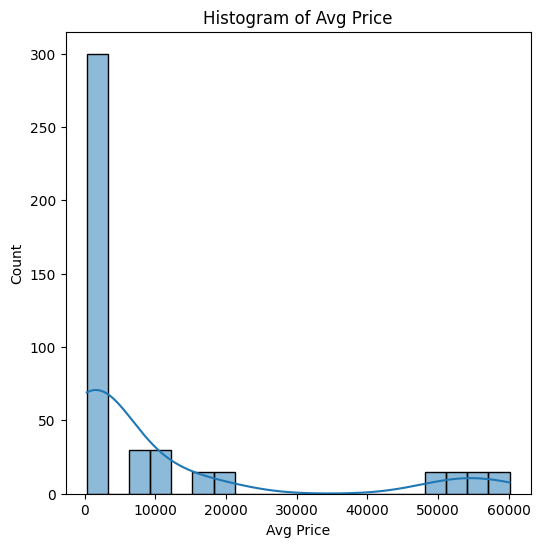

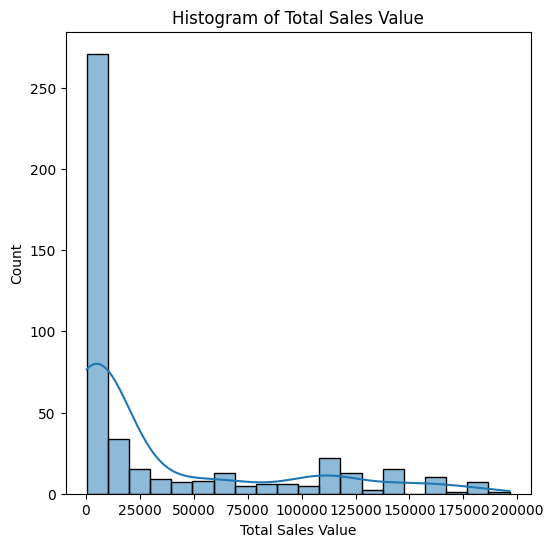

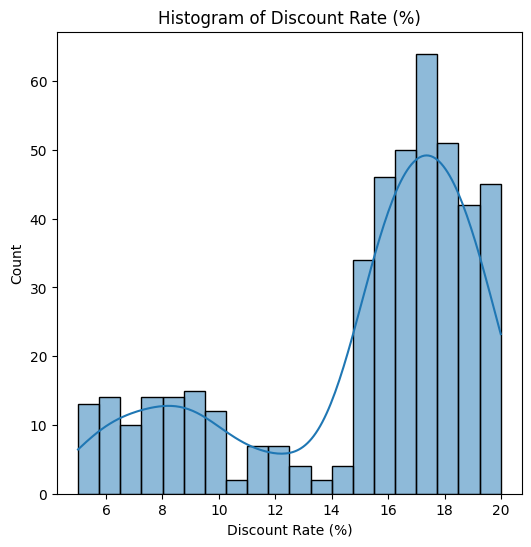

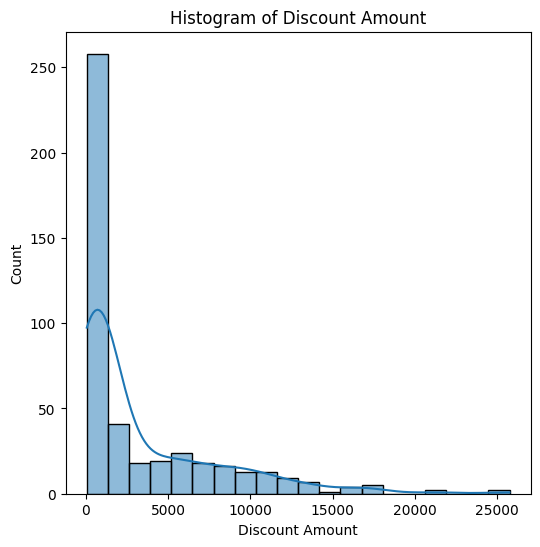

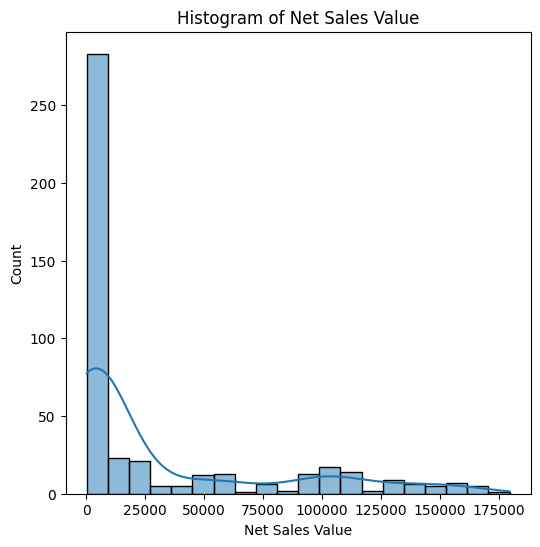

In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns

# ---Histograms for numerical columns
for col in Numerical_cols:
    plt.figure(figsize=(6, 6))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()



Histogram Analysis

Volume: Right-skewed — most products sell in small quantities, few have high sales.

Avg Price: Wide variation — mix of low-cost and premium products.

Sales Values: Highly right-skewed — few large transactions dominate revenue.

Discount Rate (%): Mostly 10–20%, showing consistent discounting.

Discount Amount: Right-skewed — large discounts occur on expensive items.
Inference: Sales follow a long-tail pattern — many small sales, few large ones.

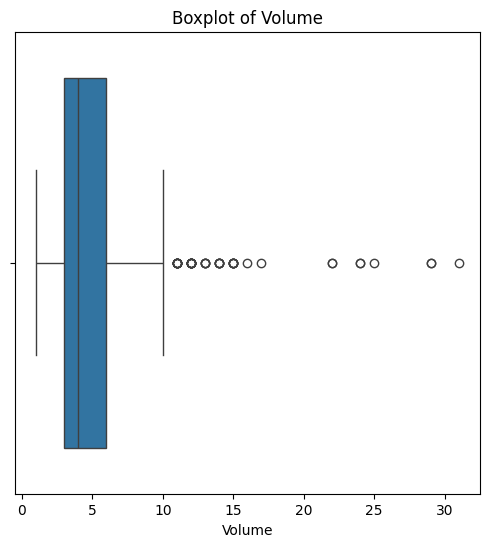

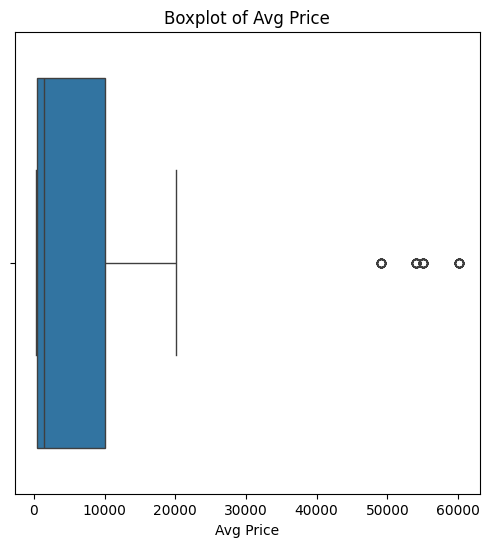

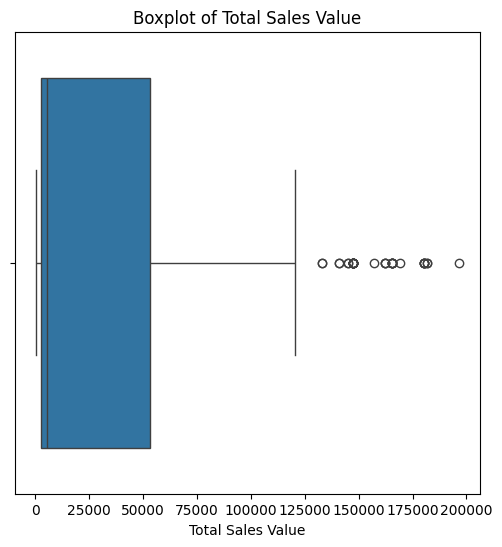

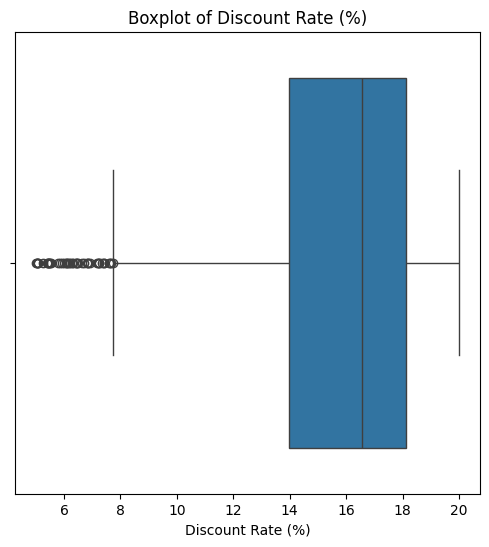

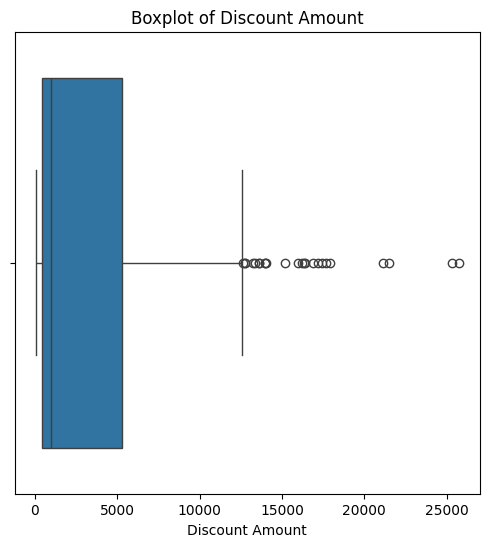

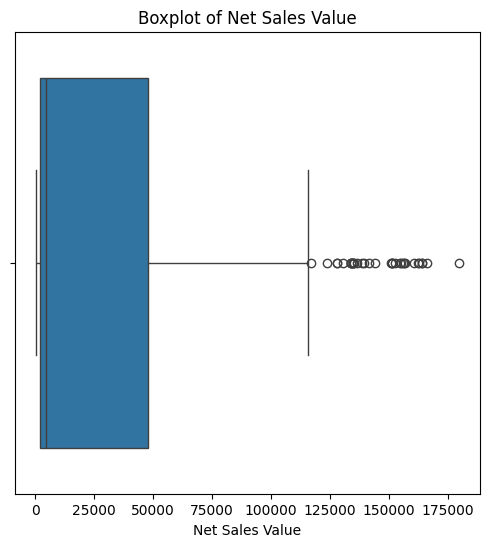

In [17]:
# --- Boxplots for numerical variables
for col in Numerical_cols:
    plt.figure(figsize=(6, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Box Plot Analysis

Outliers in Sales and Discount Amounts represent high-value or bulk purchases.

Volume and Discount Rate show consistent ranges (narrow IQR).

Avg Price outliers confirm both budget and premium products.
Inference: Most data is consistent, with a few extreme high-value sales affecting totals.

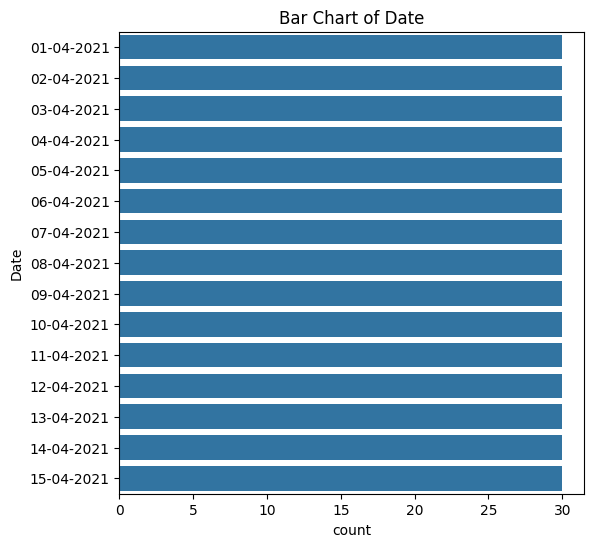

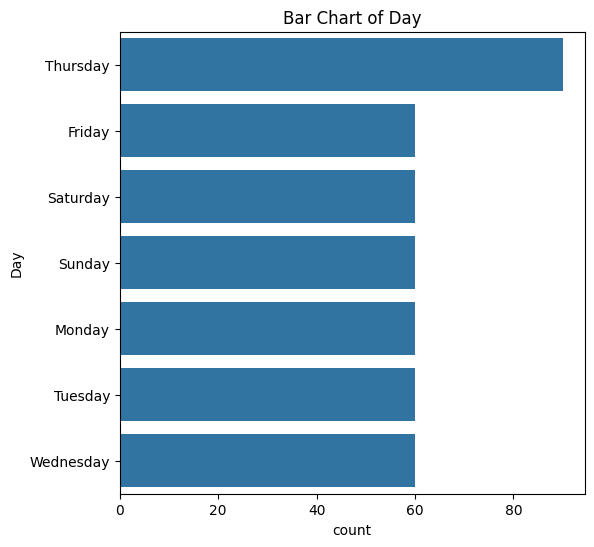

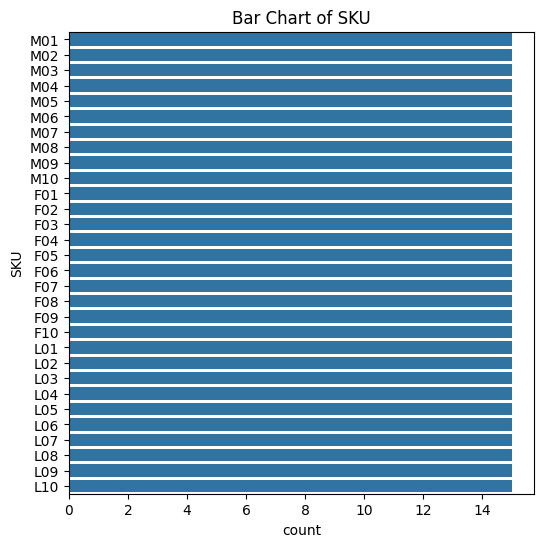

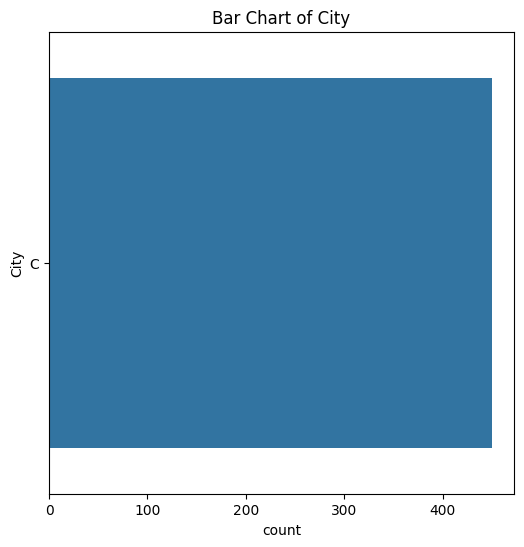

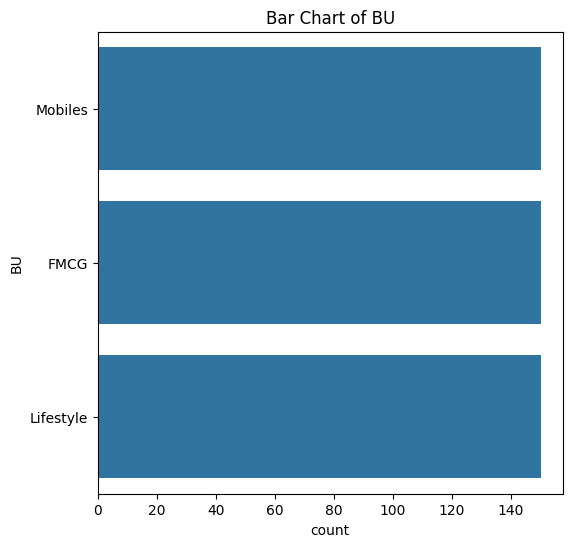

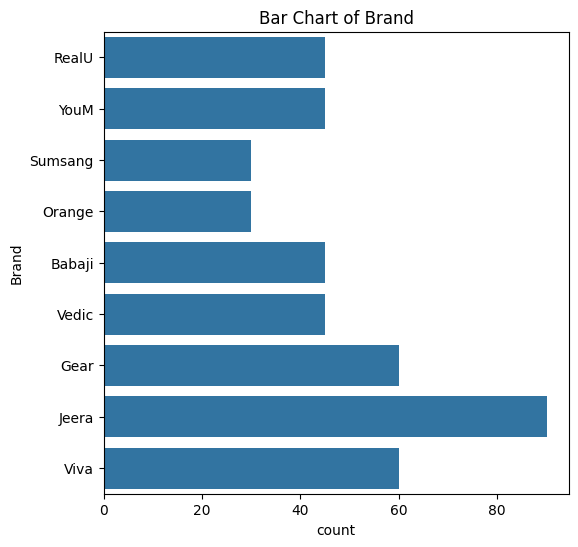

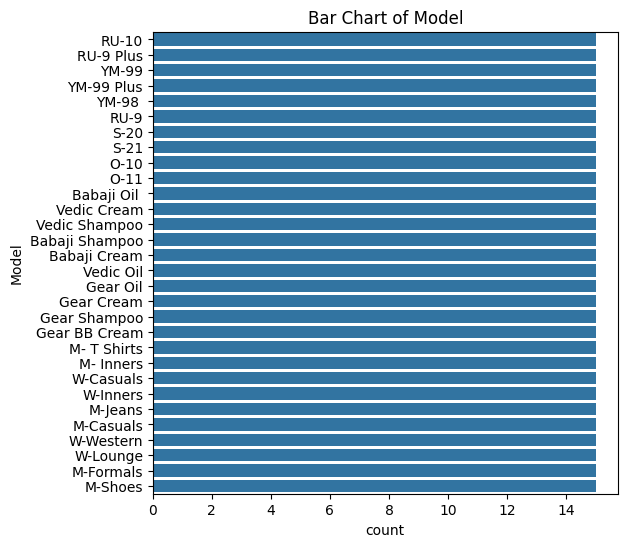

In [18]:
# ---Bar charts for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 6))
    sns.countplot(y=df[col])
    plt.title(f'Bar Chart of {col}')
    plt.show()

Bar Chart Analysis

City: Sales concentrated in a few major cities.

Brand & Model: Some brands dominate; others underperform.

Business Unit: One BU (e.g., Mobiles) leads in sales.

Day: Sales steady across days.
Inference: Sales are concentrated in top brands, cities, and products, guiding marketing and inventory decisions.

##--Summary of Key Findings--

Sales data is right-skewed, with many small transactions and a few large ones driving most revenue.

Average prices and discounts vary widely, showing a mix of budget and premium products.

Discount rates are mostly between 10–20%, indicating consistent pricing strategies.

Outliers in sales and discounts represent high-value or bulk purchases, not data errors.

Top brands and cities contribute the most to overall sales, showing strong concentration in key markets.

Overall, the dataset shows consistent discounting, diverse pricing, and a few dominant contributors to total sales.